In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, matplotlib as mpl
import seaborn.apionly as sns
# from corner import corner
from scipy.misc import logsumexp
import pcmdpy as ppy
%matplotlib inline

GPU acceleration not available, sorry
pycuda not installed.


In [2]:
reload(ppy)

<module 'pcmdpy' from '/Users/bcook/pCMDs/pixcmd/pcmdpy/__init__.pyc'>

In [3]:
#ppy.gpu_utils.initialize_gpu(0)

In [4]:
sns.set_context('poster')

| Dyn Run | Nim | Npoints |   Data   | Model  | LikeMode|
|---------|-----|---------|----------|--------|---------| 
| 1       | 256 | 50      | mock     | const  | binned  | 
| 2       | 1024| 50      | mock     | const  | binned  | 
| 3       | 256 | 50      | mock     | tau    | binned  | 
| 4       | 1024| 50      | mock     | tau    | binned  | 
| 5       | 256 | 50      | mock     | const  | Gauss   | 
| 6       | 1024| 50      | mock     | const  | Gauss   | 
| 7       | 256 | 50      | mock     | tau    | Gauss   | 
| 8       | 1024| 50      | mock     | tau    | Gauss   | 
| 9       | 256 | 200     | mock     | tau    | binned  | 
| 10      | 1024| 200     | mock     | tau    | binned  | 
| 11      | 256 | 200     | mock     | tau    | Gauss   | 
| 12      | 1024| 200     | mock     | tau    | Gauss   | 
| 13      | 256 | 50      | mock     | full   | binned  |
| 14      | 1024| 50      | mock     | full   | binned  |
| 15      | 1024| 50      | M31BULGE | tau    | binned  | 
| 16      | 1024| 50      | M31BULGE | tau    | Gauss   | 
| 17      | 1024| 50      | M31 DISK | tau    | binned  |
| 18      | 1024| 50      | M31 DISK | tau    | Gauss   |
| 19      | 512 | 200     | M31BULGE | full   | binned  |
| 20      | 512 | 200     | M31 DISK | full   | binned  |
| 21      | 512 | 200     | M31BULGE | full   | Gauss   |
| 22      | 512 | 200     | M31 DISK | full   | Gauss   |



In [5]:
dfs = {}
for i in range(1, 15):
    try:
        dfs[i] = pd.read_csv('results/dynesty_{:d}.csv'.format(i))
    except:
        dfs[i] = pd.read_csv('results/dynesty_{:d}.csv'.format(i), compression='gzip')

In [6]:
for i in range(1, 9):
    j = i + 14
    try:
        dfs[j] = pd.read_csv('results/datatest_{:d}.csv'.format(i))
    except:
        dfs[j] = pd.read_csv('results/datatest_{:d}.csv'.format(i), compression='gzip')

In [7]:
for i,df in enumerate(dfs.values()):
    df['log_weights'] = df.logwt.values - logsumexp(df.logwt.values)
    df['weights'] = np.exp(df['log_weights'])

In [8]:
for i in [13, 14, 19, 20, 21, 22]:
    df = dfs[i]
    df.logNpix = np.log10(np.sum(10.**df[['logSFH0','logSFH1','logSFH2','logSFH3','logSFH4','logSFH5','logSFH6']].values, axis=1))

In [9]:
def plot_chains_tau(df, truths=None, axes=None, title=None, plot_vs_time=False):
    if axes is None:
        if plot_vs_time:
            nr = 4
        else:
            nr = 5
        fig, axes = plt.subplots(nrows=nr, figsize=(8, 10), sharex=True)
    if plot_vs_time:
        axes[0].plot(df.time_elapsed, df.logzh)
        axes[1].plot(df.time_elapsed, df.logdust)
        axes[2].plot(df.time_elapsed, df.logNpix)
        axes[3].plot(df.time_elapsed, df.tau)
        axes[-1].set_xlabel('time (s)')
    else:
        axes[0].plot(df.logzh)
        axes[1].plot(df.logdust)
        axes[2].plot(df.logNpix)
        axes[3].plot(df.tau)        
        axes[-1].plot(df.time_elapsed)
        axes[-1].set_ylabel('time')
#         axes[-1].set_yscale('log')
        axes[-1].set_xlabel('Iteration')
    axes[0].set_ylabel('[Fe/H]')
    axes[1].set_ylabel('log E(B-V)')
    axes[2].set_ylabel('log Npix')
    axes[3].set_ylabel(r'$\tau$ (Gyr)')
    if truths is not None:
        for i in range(4):
            axes[i].axhline(y=truths[i], color='r', ls='--')
    if title is not None:
        not_finished = np.all(np.diff(df.ncall.values) >= 0)
        if not_finished:
            nc = int(df.ncall.values[-1])
        else:
            nc = int(df.ncall.sum())
        title += ' {:d} calls'.format(nc)
        axes[0].set_title(title)
    return axes

In [10]:
def plot_chains_SSP(df, truths=None, axes=None, title=None, plot_vs_time=False):
    if axes is None:
        if plot_vs_time:
            nr = 4
        else:
            nr = 5
        fig, axes = plt.subplots(nrows=nr, figsize=(8, 10), sharex=True)
    if plot_vs_time:
        axes[0].plot(df.time_elapsed, df.logzh)
        axes[1].plot(df.time_elapsed, df.logdust)
        axes[2].plot(df.time_elapsed, df.logNpix)
        axes[3].plot(df.time_elapsed, df.logage)
        axes[-1].set_xlabel('time')
    else:
        axes[0].plot(df.logzh)
        axes[1].plot(df.logdust)
        axes[2].plot(df.logNpix)
        axes[3].plot(df.logage)
        axes[-1].plot(df.time_elapsed)
        axes[-1].set_ylabel('time')
#         axes[-1].set_yscale('log')
        axes[-1].set_xlabel('Iteration')
    axes[0].set_ylabel('[Fe/H]')
    axes[1].set_ylabel('log E(B-V)')
    axes[2].set_ylabel('log Npix')
    axes[3].set_ylabel('log age (yr)')
    if truths is not None:
        for i in range(4):
            axes[i].axhline(y=truths[i], color='r', ls='--')
    if title is not None:
        not_finished = np.all(np.diff(df.ncall.values) >= 0)
        if not_finished:
            nc = int(df.ncall.values[-1])
        else:
            nc = int(df.ncall.sum())
        title += ' {:d} calls'.format(nc)
        axes[0].set_title(title)
    return axes

In [11]:
def plot_chains_const(df, truths=None, axes=None, title=None, plot_vs_time=False):
    if axes is None:
        if plot_vs_time:
            nr = 3
        else:
            nr = 4
        fig, axes = plt.subplots(nrows=nr, figsize=(8, 8), sharex=True)
    if plot_vs_time:
        axes[0].plot(df.time_elapsed, df.logzh)
        axes[1].plot(df.time_elapsed, df.logdust)
        axes[2].plot(df.time_elapsed, df.logNpix)
        axes[-1].set_xlabel('time')
    else:
        axes[0].plot(df.logzh)
        axes[1].plot(df.logdust)
        axes[2].plot(df.logNpix)
        axes[-1].plot(df.time_elapsed)
        axes[-1].set_ylabel('time')
#         axes[-1].set_yscale('log')
        axes[-1].set_xlabel('Iteration')
    axes[0].set_ylabel('[Fe/H]')
    axes[1].set_ylabel('log E(B-V)')
    axes[2].set_ylabel('log Npix')
    if truths is not None:
        for i in range(3):
            axes[i].axhline(y=truths[i], color='r', ls='--')
    if title is not None:
        not_finished = np.all(np.diff(df.ncall.values) >= 0)
        if not_finished:
            nc = int(df.ncall.values[-1])
        else:
            nc = int(df.ncall.sum())
        title += ' {:d} calls'.format(nc)
        axes[0].set_title(title)
    return axes

In [12]:
def plot_chains_full(df, truths=None, axes=None, title=None, plot_vs_time=False):
    if axes is None:
        if plot_vs_time:
            nr = 10
        else:
            nr = 11
        fig, axes = plt.subplots(nrows=nr, figsize=(8, 16), sharex=True)
    if plot_vs_time:
        axes[0].plot(df.time_elapsed, df.logzh)
        axes[1].plot(df.time_elapsed, df.logdust)
        for i in range(7):
            colname = 'logSFH{:d}'.format(i)
            axes[i+2].plot(df.time_elapsed, df[colname])
        axes[-1].plot(df.time_elapsed, df.logNpix)
    else:
        axes[0].plot(df.logzh)
        axes[1].plot(df.logdust)
        for i in range(7):
            colname = 'logSFH{:d}'.format(i)
            axes[i+2].plot(df[colname])
        axes[-2].plot(df.logNpix)
        axes[-1].plot(df.time_elapsed)
        axes[-1].set_ylabel('time')
#         axes[-1].set_yscale('log')
        axes[-1].set_xlabel('Iteration')
        
    axes[0].set_ylabel('[Fe/H]')
    axes[1].set_ylabel('log E(B-V)')
    for i in range(7):            
        colname = 'logSFH{:d}'.format(i)
        axes[i+2].set_ylabel(colname)
    axes[-2].set_ylabel('log Npix')
    if truths is not None:
        for i in range(10):
            axes[i].axhline(y=truths[i], color='r', ls='--')
    if title is not None:
        not_finished = np.all(np.diff(df.ncall.values) >= 0)
        if not_finished:
            nc = int(df.ncall.values[-1])
        else:
            nc = int(df.ncall.sum())
        title += ' {:d} calls'.format(nc)
        axes[0].set_title(title)
    return axes

In [13]:
def plot_chains(df, **kwargs):
    if 'tau' in df.columns:
        return plot_chains_tau(df, **kwargs)
    elif 'logSFH0' in df.columns:
        return plot_chains_full(df, **kwargs)
    elif 'logage' in df.columns:
        return plot_chains_SSP(df, **kwargs)
    else:
        return plot_chains_const(df, **kwargs)

In [14]:
titles = {}
titles[1] = 'Run 1 (Const, Binned, 256, 50pts)'
titles[2] = 'Run 2 (Const, Binned, 1024, 50pts)'
titles[3] = 'Run 3 (Tau, Binned, 256, 50pts)'
titles[4] = 'Run 4 (Tau, Binned, 1024, 50pts)'
titles[5] = 'Run 5 (Const, Gauss, 256, 50pts)'
titles[6] = 'Run 6 (Const, Gauss, 1024, 50pts)'
titles[7] = 'Run 7 (Tau, Gauss, 256, 50pts)'
titles[8] = 'Run 8 (Tau, Gauss, 1024, 50pts)'
titles[9] = 'Run 9 (Tau, Binned, 256, 200pts)'
titles[10] = 'Run 10 (Tau, Binned, 1024, 200pts)'
titles[11] = 'Run 11 (Tau, Gauss, 256, 200pts)'
titles[12] = 'Run 12 (Tau, Gauss, 1024, 200pts)'
titles[13] = 'Run 13 (Full, Binned, 256, 50pts)'
titles[14] = 'Run 14 (Full, Binned 1024, 50pts)'
titles[15] = 'Data 1 (Bulge, Tau, Binned, 1024, 50pts)'
titles[16] = 'Data 2 (Bulge Tau, Gauss, 1024, 50pts)'
titles[17] = 'Data 3 (Disk, Tau, Binned, 1024, 50pts)'
titles[18] = 'Data 4 (Disk Tau, Gauss, 1024, 50pts)'
titles[19] = 'Data 5 (Bulge, Full, Binned, 512, 200pts)'
titles[20] = 'Data 6 (Disk, Full, Binned, 512, 200pts)'
titles[21] = 'Data 7 (Bulge, Full, Gauss, 512, 200pts)'
titles[22] = 'Data 8 (Disk, Full, Gauss, 512, 200pts)'

In [15]:
truths = {}
for i in [1,2,5,6]:
    truths[i] = [-0.5, -1., 3.]
for i in [3,4,7,8,9,10,11,12]:
    truths[i] = [-0.5, -1., 3., 3.]
model = ppy.galaxy.Tau_Model(np.array([-0.5, -1., 3., 3.]))
params = np.append(model._params[:-2], np.log10(model.SFH))
params = np.append(params, 3.)
truths[13] = truths[14] = params
for i in [15, 16]:
    truths[i] = [0., -2., 2.3, 4.]
for i in [17, 18]:
    truths[i] = [0, -2., 1.5, 4.]
model = ppy.galaxy.Tau_Model(np.array([0., -2.5, 2.3, 4.]))
params = np.append(model._params[:-2], np.log10(model.SFH))
truths[19] = truths[21] = np.append(params, 2.3)
model = ppy.galaxy.Tau_Model(np.array([0., -2.5, 1.5, 4.]))
params = np.append(model._params[:-2], np.log10(model.SFH))
truths[20] = truths[22] =  np.append(params, 1.5)

In [16]:
def plot_multiple(runs, sharex=True, sharey='row', **kwargs):
    lens = [len(truths[r]) for r in runs]
    if 'plot_vs_time' not in kwargs.keys():
        nr = max(lens) + 1
    else:
        nr = max(lens)
    fig, axes = plt.subplots(nrows=nr, ncols=len(runs), figsize=(8*len(runs), 2*nr), sharex=sharex, sharey=sharey)
    for i, r in enumerate(runs):
        plot_chains(dfs[r], truths=truths[r], axes=axes[:,i], title=titles[r], **kwargs)
    plt.tight_layout()
    return axes

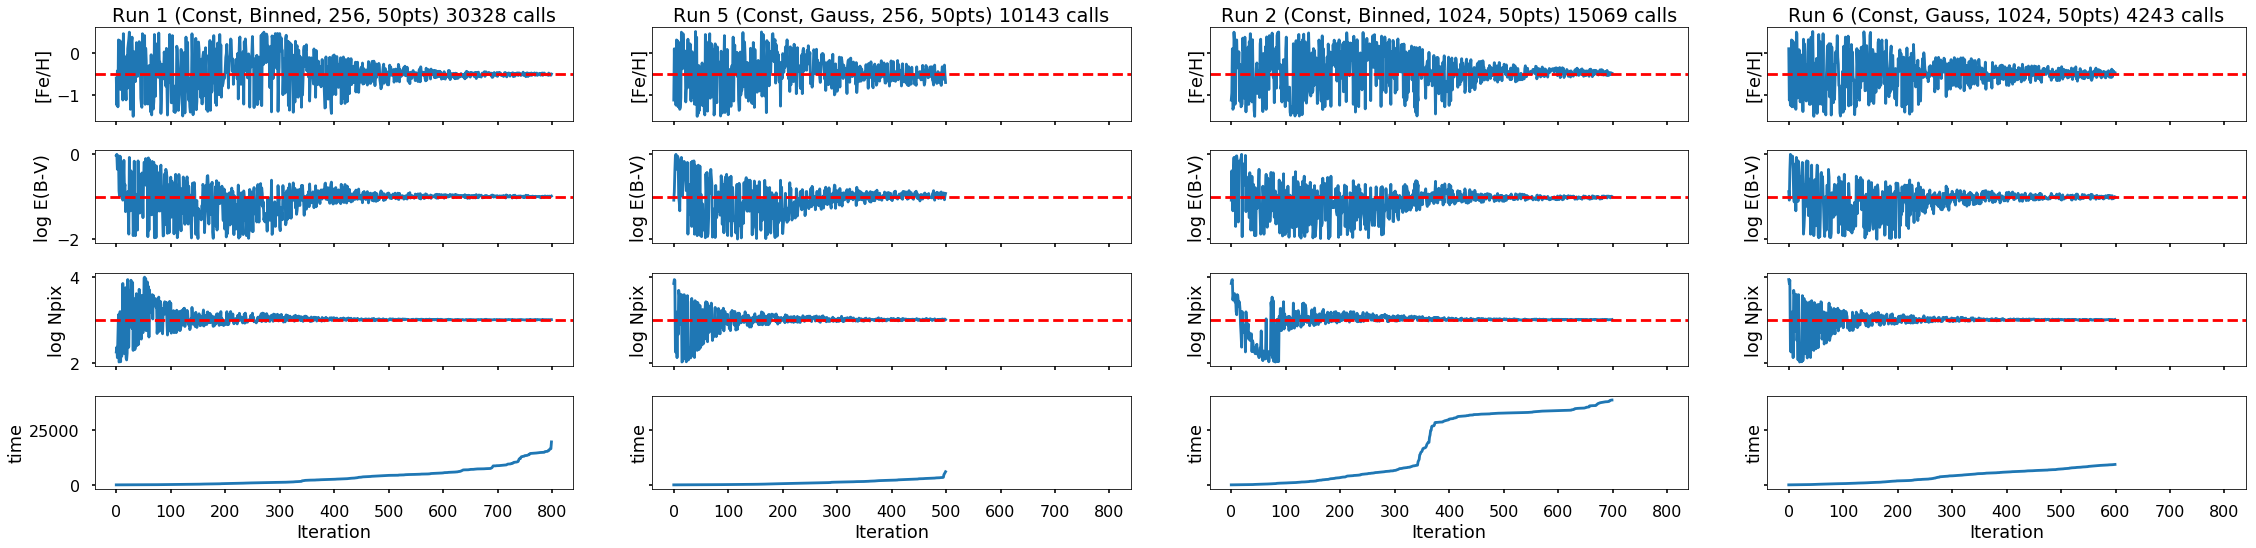

In [17]:
axes = plot_multiple([1, 5, 2, 6])

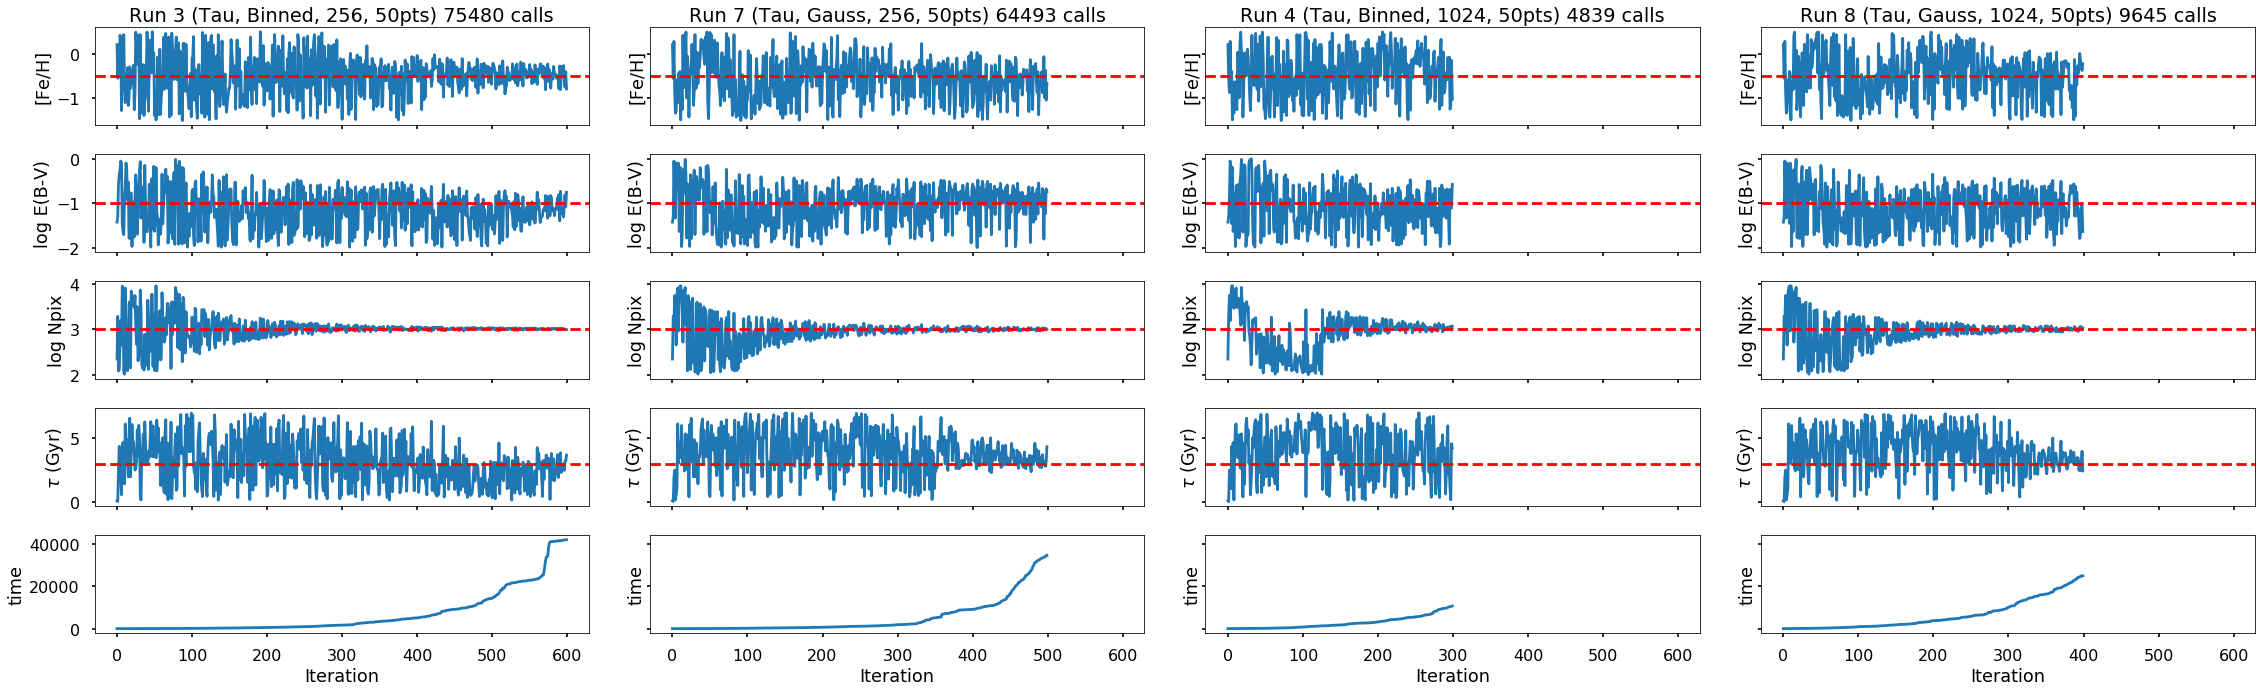

In [18]:
axes = plot_multiple([3,7,4,8])

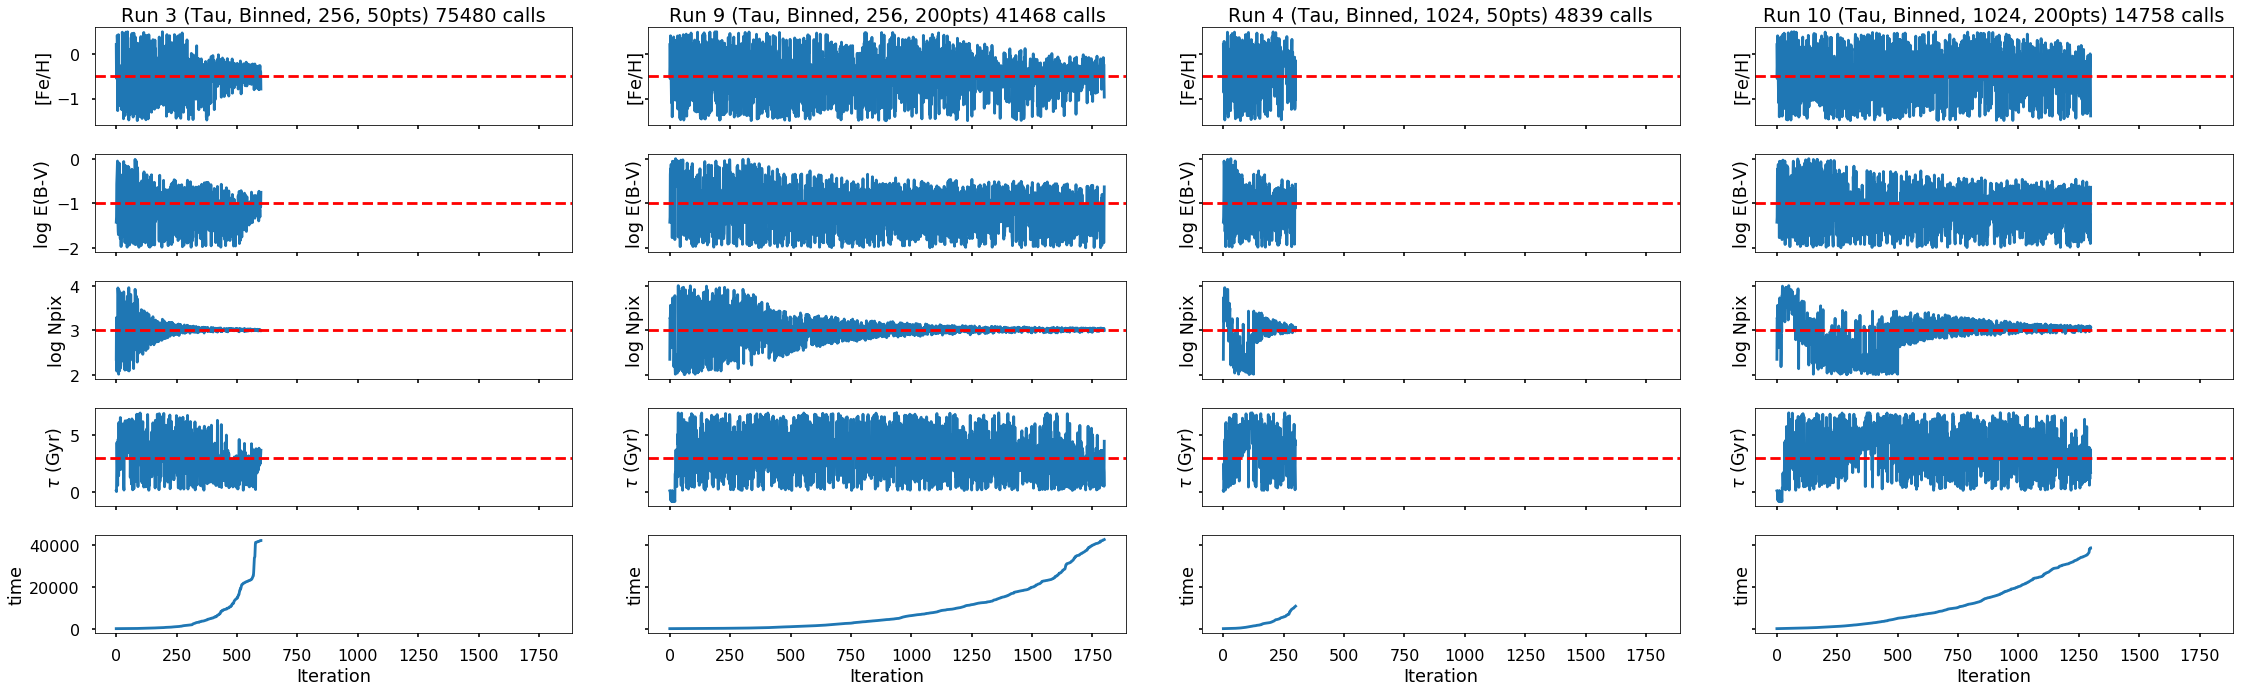

In [19]:
axes = plot_multiple([3,9,4,10])

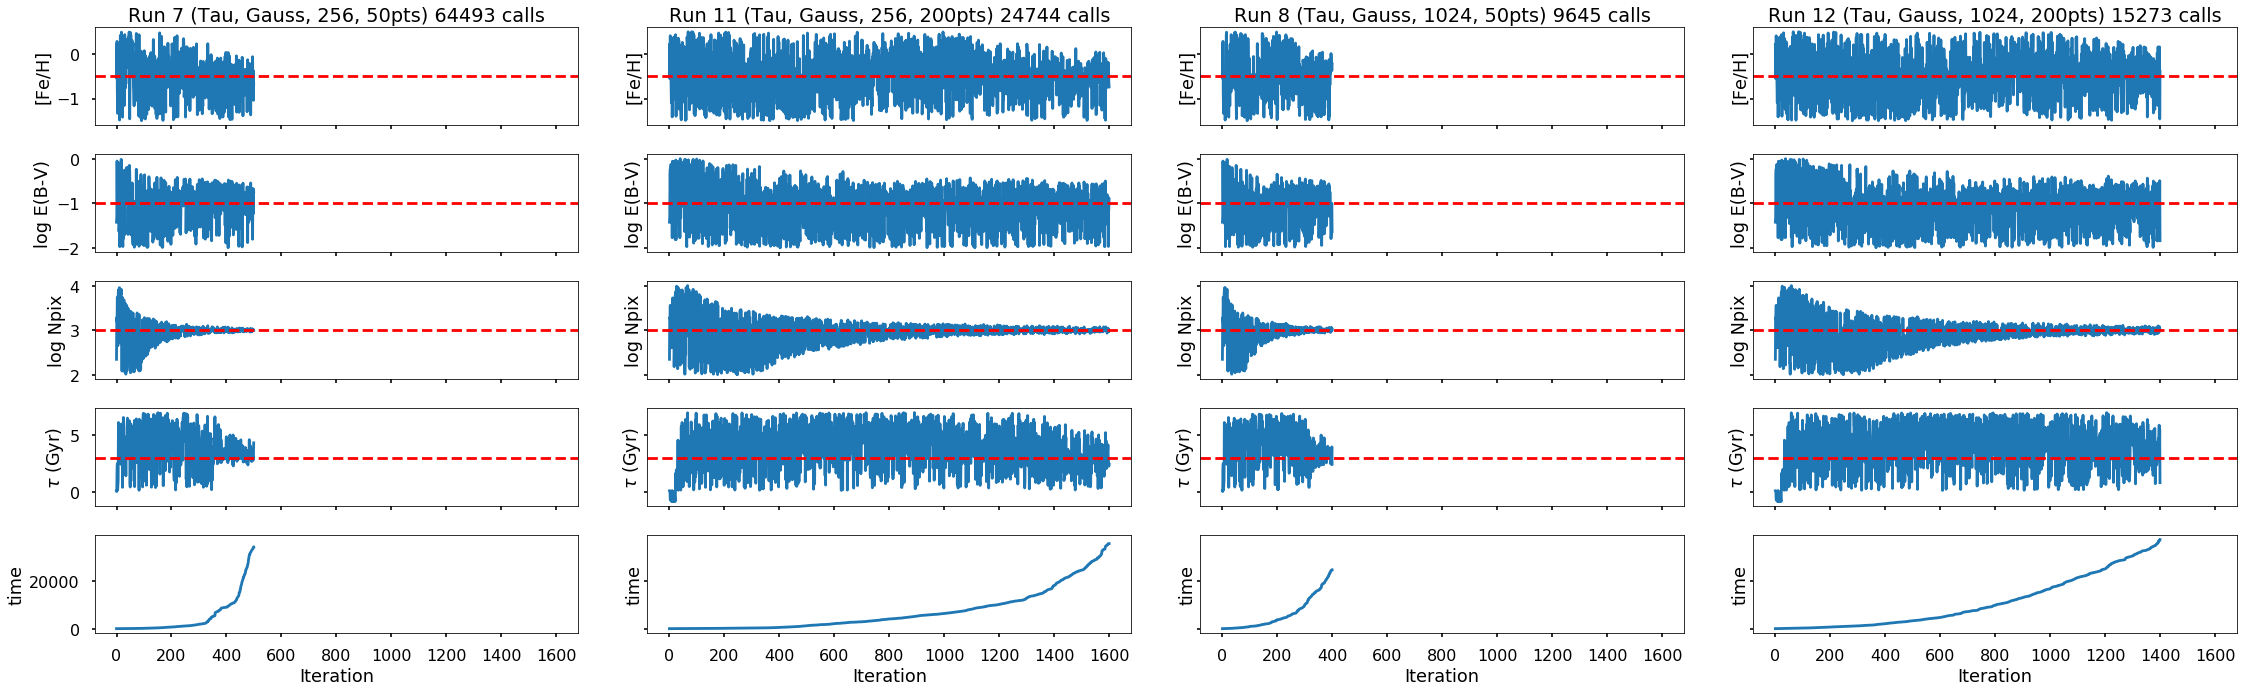

In [20]:
axes = plot_multiple([7,11,8,12])

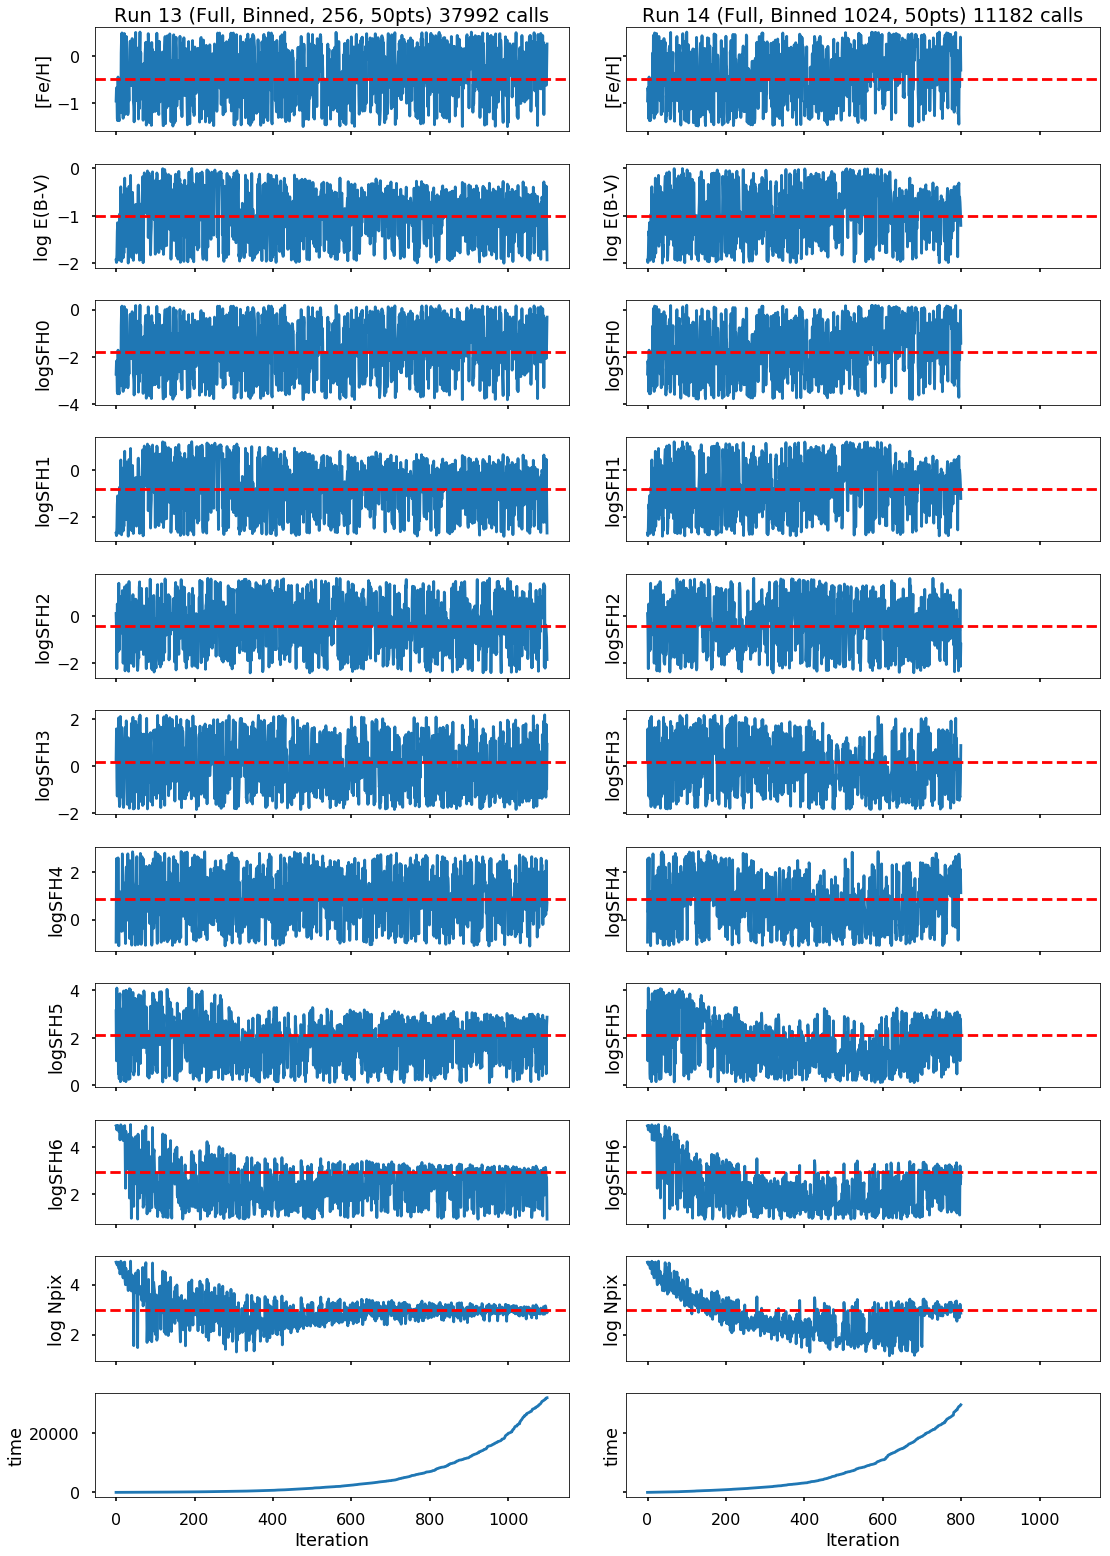

In [21]:
axes = plot_multiple([13, 14])

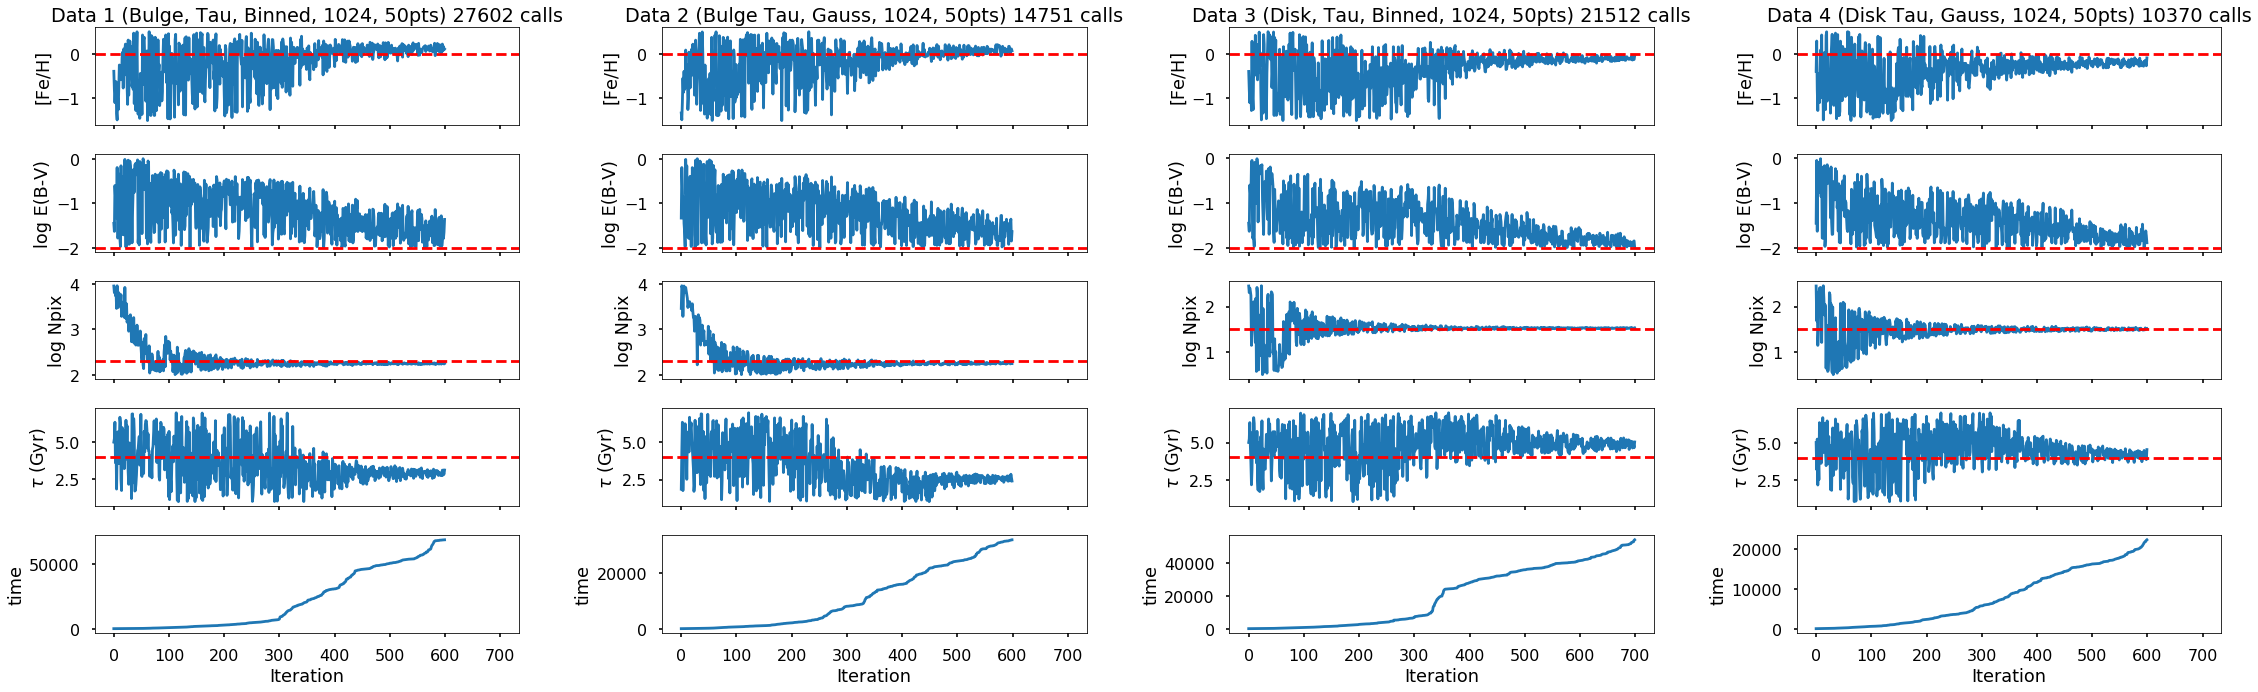

In [25]:
axes = plot_multiple([15, 16, 17, 18], sharey=False)

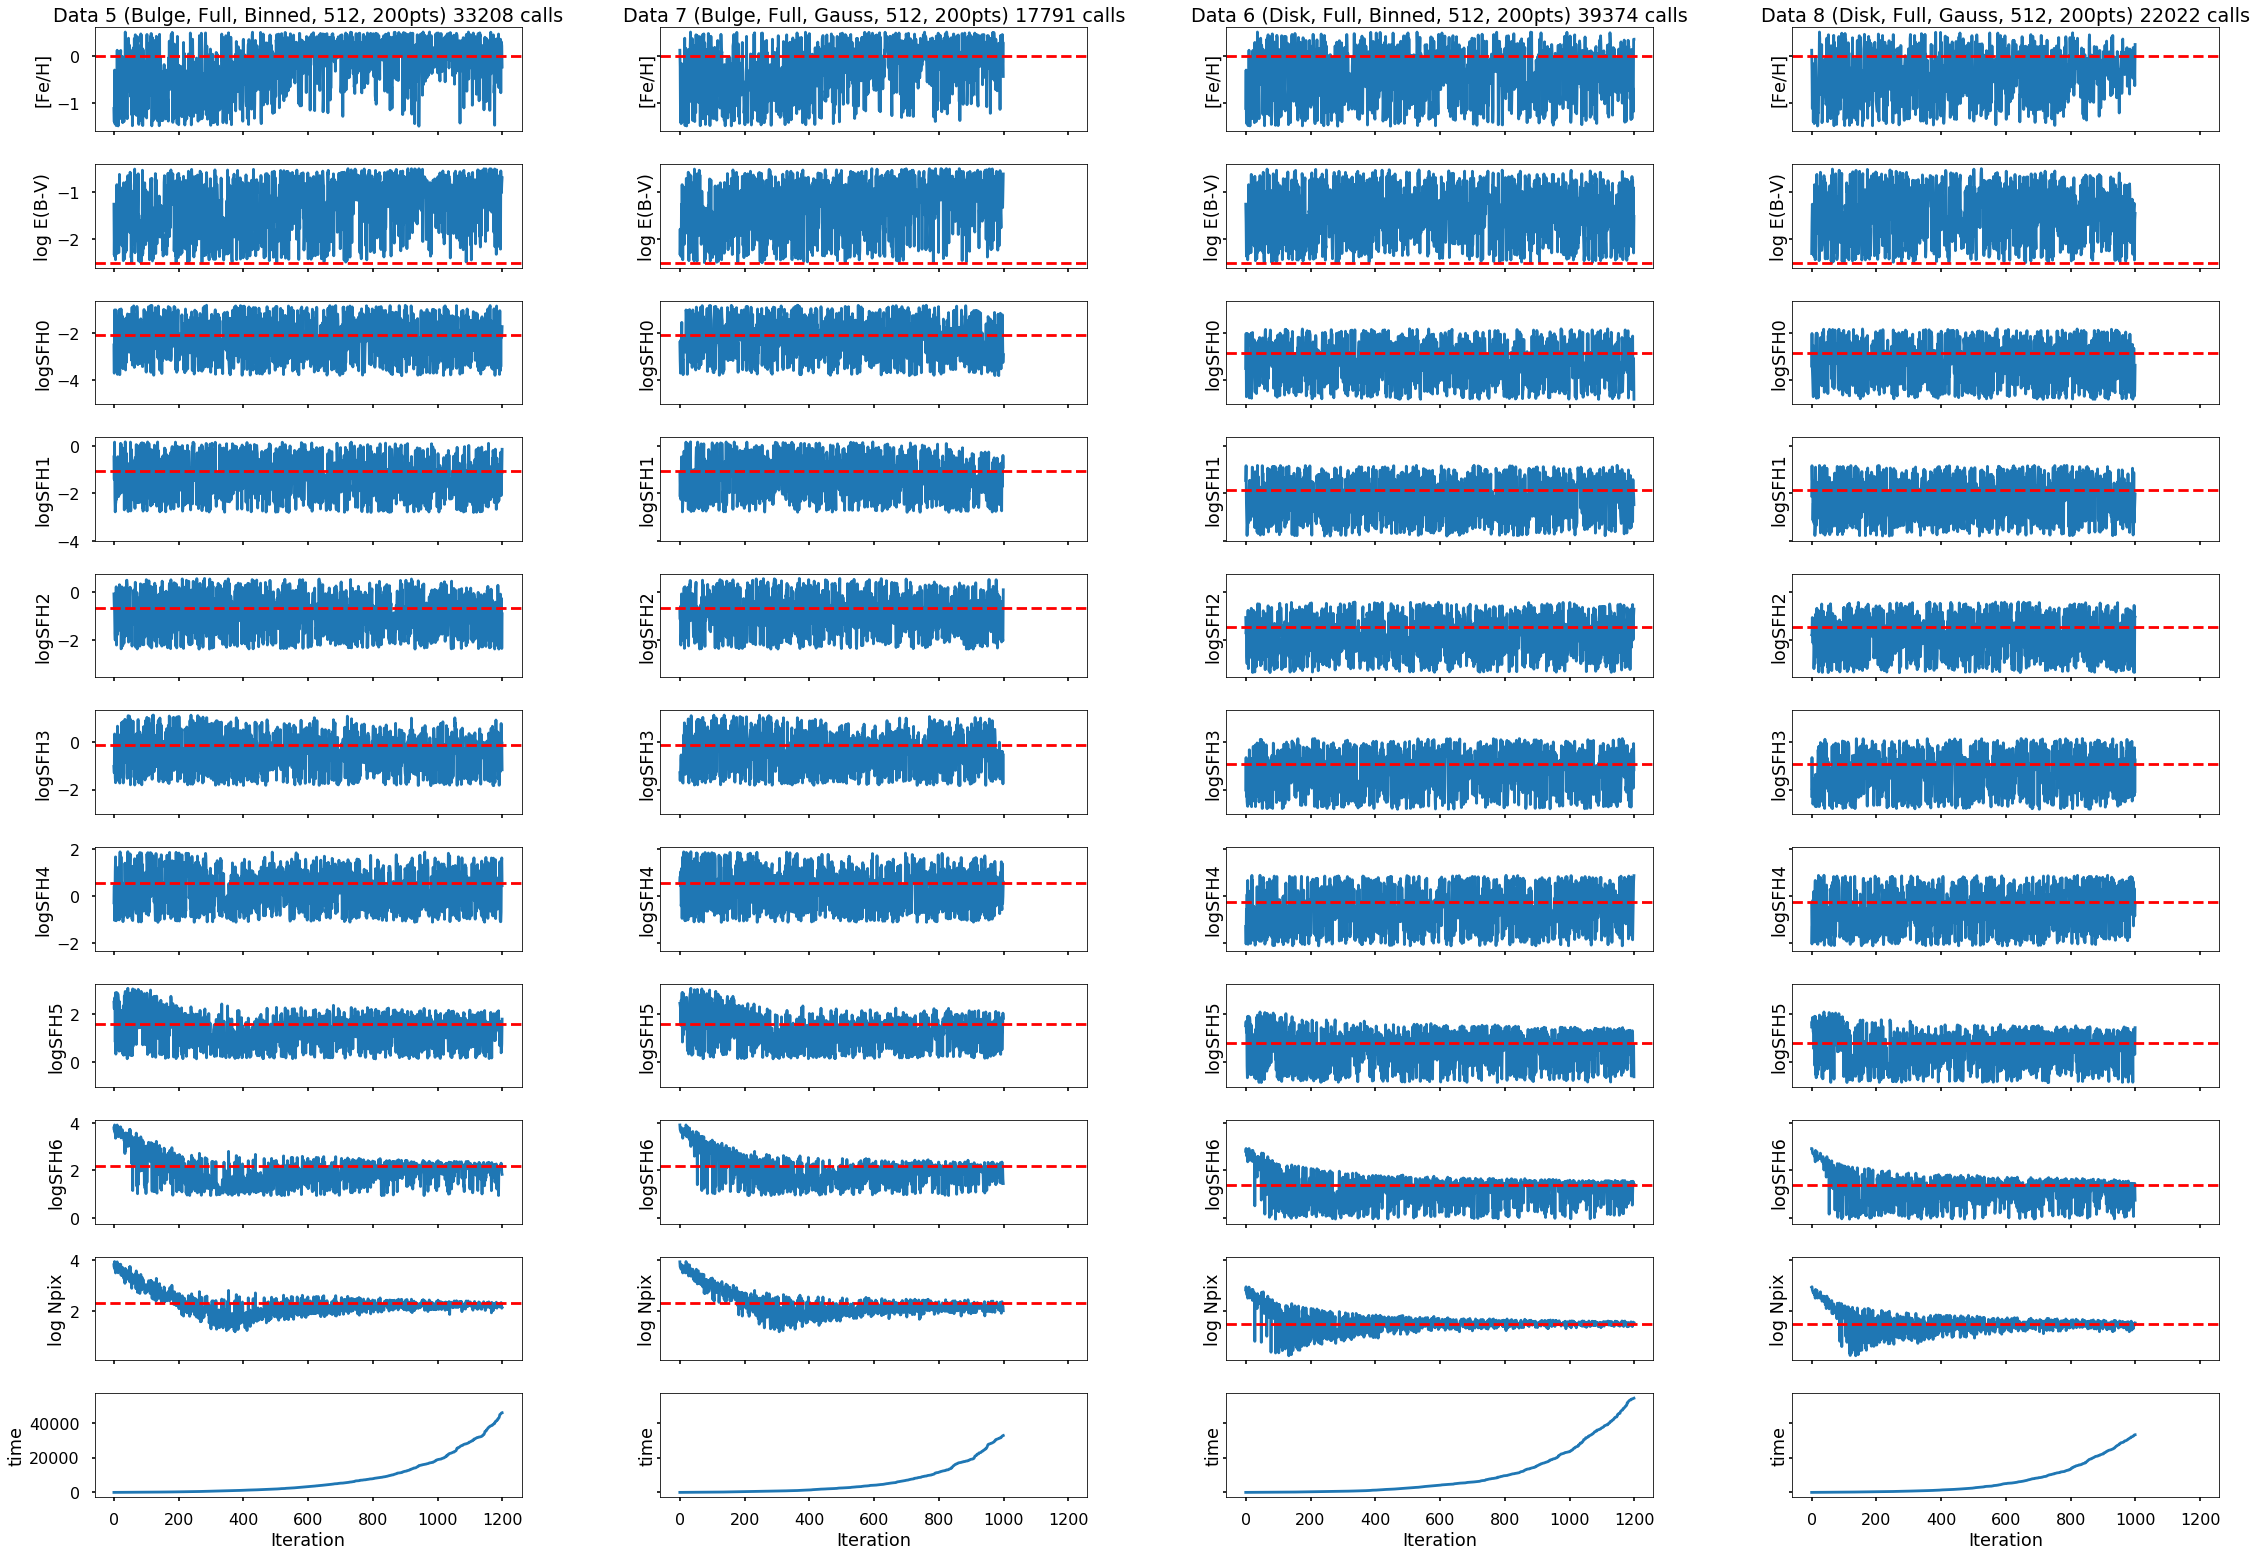

In [24]:
axes = plot_multiple([19,21, 20,22])

In [82]:
axes = plot_chains(dfs[17], title=None)
axes[0].set_title('M31 Disk')
plt.tight_layout()
plt.savefig('figures/M31_Disk.pdf')

TypeError: plot_chains_tau() got an unexpected keyword argument 'show_eff'

In [16]:
pcmd_disk = np.loadtxt('../data/m31_b06-263.dat', unpack=True)

In [17]:
pcmd_bulge = np.loadtxt('../data/m31_bulge_M2.dat', unpack=True)

In [18]:
pcmd_disk

array([[ 0.722998,  0.794544,  0.681635, ...,  0.850231,  0.900774,
         0.843838],
       [ 2.87926 ,  3.08465 ,  2.59377 , ...,  3.061   ,  3.00865 ,
         2.87643 ]])

In [19]:
dmod = 24.47
d_mpc = 10.**((dmod - 25.)/5.) #about 0.78

In [20]:
reload(ppy)

<module 'pcmdpy' from '/Users/bcook/pCMDs/pixcmd/pcmdpy/__init__.pyc'>

In [22]:
filters = [ppy.instrument.Filter.HST_F475W(d_mpc), ppy.instrument.Filter.HST_F814W(d_mpc)]
#iso_model = ppy.isochrones.Isochrone_Model(filters, MIST_path='../pcmdpy/isoc_MIST_v1.1/',
#                                            conversions=np.array([-0.0978757217, 0.4236631949]))
iso_model = ppy.isochrones.Isochrone_Model(filters, MIST_path='../pcmdpy/isoc_MIST_v0.29_x5FEWER/')
driver = ppy.driver.Driver(iso_model, gpu=False)
# driver2 = ppy.driver.Driver(iso_model2, gpu=False)

In [60]:
params = np.array([0., -2., 1.4, 5.])
gal = ppy.galaxy.Tau_Model(params)

In [61]:
mags, _ = driver.simulate(gal, 500, norm_by_mass=True)
pcmd_model = ppy.utils.make_pcmd(mags)

In [62]:
ssp = ppy.galaxy.Galaxy_SSP(np.array([0., 3., 10., 10.]))

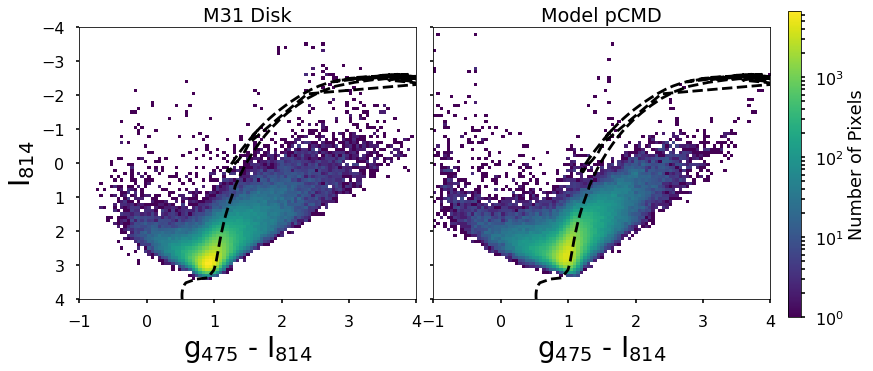

In [110]:
fig, axes = plt.subplots(ncols=2, figsize=(12,5), sharex=True, sharey=True)
nbins = 100
norm = mpl.colors.LogNorm()
bins=[np.linspace(-1, 4, nbins), np.linspace(-4, 5, nbins)]
plt.subplot(axes[0])
plt.hist2d(pcmd_disk[0], pcmd_disk[1], bins=bins, norm=norm, cmap='viridis')
plt.subplot(axes[1])
plt.hist2d(pcmd_model[0], pcmd_model[1], bins=bins, norm=norm, cmap='viridis')
axes[0].set_ylim([4, -4]), axes[1].set_xlim([-1, 4])
iso_model.plot_isochrone(ssp, ax=axes[0], ls='--')
iso_model.plot_isochrone(ssp, ax=axes[1], ls='--')
axes[0].set_title('M31 Disk'), axes[1].set_title('Model pCMD')
axes[1].set_ylabel('')
cax = fig.add_axes([.92, 0.075, 0.015, 0.85])
plt.colorbar(label='Number of Pixels', cax=cax)
plt.subplots_adjust(wspace=0.05, left=0.1)
# plt.tight_layout()
plt.savefig('figures/model_compare_test.pdf', pad_inches=0.2, bbox_inches='tight')

iso_model._interp_cols, iso_model2._interp_cols

In [199]:
df1 = iso_model.MIST_df
df2 = iso_model2.MIST_df
df3 = iso_model3.MIST_df

In [200]:
df1 = df1[(df1.z==0.) & (df1.age==10.)]

In [201]:
df2 = df2[(df2.z==0.)&(df2.age==10.)]

In [202]:
df3 = df3[(df3.z==0.)&(df3.age==10.)]

In [203]:
df1.head()

,age,initial_mass,logT,logg,logIMF,bmag,vmag,imag,jmag,hmag,f275,f336,fuv,nuv,z
77470,10.0,0.0930,3.4511,-3.1083,-0.0614,16.8230,16.1662,12.8983,11.6169,11.3589,24.0871,20.0523,33.0,31.149,0.0
77471,10.0,0.1045,3.4658,-2.9395,-0.3015,15.6671,14.9538,12.3050,11.2772,11.0105,22.7233,19.0585,33.0,29.692,0.0
77472,10.0,0.1261,3.4835,-2.7261,-0.2761,14.9410,14.2652,11.6840,10.7096,10.4665,22.2161,18.2323,33.0,27.815,0.0
77473,10.0,0.1584,3.4993,-2.5100,-0.3622,14.2025,13.5487,11.0711,10.1541,9.9177,21.7333,17.4715,33.0,26.438,0.0
77474,10.0,0.2004,3.5096,-2.3110,-0.5085,13.5461,12.9058,10.5302,9.6589,9.4250,21.1379,16.7960,33.0,24.923,0.0


In [204]:
df2.head()

,EEP,age,initial_mass,star_mass,log_Teff,log_g,log_L,[Fe/H]_init,[Fe/H],ACS_WFC_F435W,...,ACS_WFC_F606W,ACS_WFC_F625W,ACS_WFC_F658N,ACS_WFC_F660N,ACS_WFC_F775W,ACS_WFC_F814W,ACS_WFC_F850LP,ACS_WFC_F892N,phase,z
1107571,242,10.0,0.100000,0.099999,3.460511,5.235368,-3.000534,0.0,0.043038,17.365831,...,15.162918,14.831732,14.012798,14.086321,12.493348,12.125379,11.450067,11.828913,0.0,0.0
1107572,243,10.0,0.112753,0.112752,3.469474,5.204721,-2.889123,0.0,0.043317,16.755136,...,14.610814,14.277619,13.473553,13.546995,12.108555,11.768383,11.131033,11.460440,0.0,0.0
1107573,244,10.0,0.115952,0.115951,3.471725,5.197026,-2.861158,0.0,0.043398,16.607046,...,14.476635,14.143050,13.343499,13.416961,12.014232,11.680524,11.052188,11.370251,0.0,0.0
1107574,245,10.0,0.116070,0.116069,3.471808,5.196742,-2.860126,0.0,0.043401,16.601624,...,14.471719,14.138121,13.338745,13.412208,12.010768,11.677297,11.049288,11.366941,0.0,0.0
1107575,246,10.0,0.130408,0.130407,3.481898,5.162231,-2.734759,0.0,0.043781,15.968529,...,13.895979,13.561534,12.786603,12.860203,11.600625,11.294436,10.704918,10.976736,0.0,0.0


In [246]:
df1.ix[[77488]][['age', 'z', 'initial_mass', 'logT', 'bmag', 'vmag','imag']]

,age,z,initial_mass,logT,bmag,vmag,imag
77488,10.0,0.0,0.5776,3.6005,9.3784,8.7381,7.4197


In [247]:
df2.ix[[1107638]][['age', 'z', 'initial_mass', 'log_Teff', 'ACS_WFC_F475W',
                                            'ACS_WFC_F555W','ACS_WFC_F814W']]

,age,z,initial_mass,log_Teff,ACS_WFC_F475W,ACS_WFC_F555W,ACS_WFC_F814W
1107638,10.0,0.0,0.576965,3.60993,9.263142,8.544343,6.927773


In [205]:
df1.columns, df2.columns

(Index([u'age', u'initial_mass', u'logT', u'logg', u'logIMF', u'bmag', u'vmag',
        u'imag', u'jmag', u'hmag', u'f275', u'f336', u'fuv', u'nuv', u'z'],
       dtype='object'),
 Index([u'EEP', u'age', u'initial_mass', u'star_mass', u'log_Teff', u'log_g',
        u'log_L', u'[Fe/H]_init', u'[Fe/H]', u'ACS_WFC_F435W', u'ACS_WFC_F475W',
        u'ACS_WFC_F502N', u'ACS_WFC_F550M', u'ACS_WFC_F555W', u'ACS_WFC_F606W',
        u'ACS_WFC_F625W', u'ACS_WFC_F658N', u'ACS_WFC_F660N', u'ACS_WFC_F775W',
        u'ACS_WFC_F814W', u'ACS_WFC_F850LP', u'ACS_WFC_F892N', u'phase', u'z'],
       dtype='object'))

In [243]:
kv = {'bmag':'ACS_WFC_F475W', 'imag':'ACS_WFC_F814W', 'vmag':'ACS_WFC_F555W', 'logg':'log_g'}

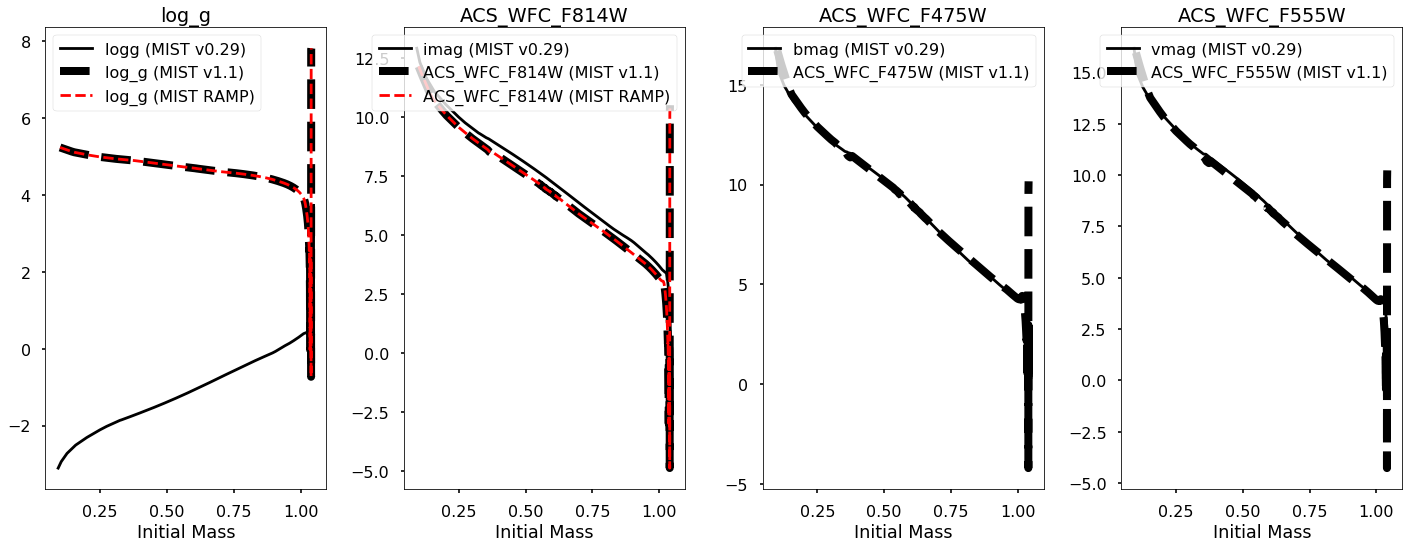

In [245]:
fig, axes = plt.subplots(figsize=(20,8), ncols=4)
for i, a in enumerate(kv.iteritems()):
    c1, c2 = a
    c3 = c2
    axes[i].plot(df1['initial_mass'], df1[c1], 'k-', label='%s (MIST v0.29)'%c1)
    axes[i].plot(df2['initial_mass'], df2[c3], 'k--', label='%s (MIST v1.1)'%c3, lw=8)
    try:
        axes[i].plot(df3['initial_mass'], df3[c3], 'r--', label='%s (MIST RAMP)'%c3)
    except:
        pass
    axes[i].set_xlabel('Initial Mass')
    axes[i].set_title(c2)
    axes[i].legend(loc=0, fontsize='small')
plt.tight_layout()
plt.savefig('figures/MIST_offsets.pdf')

(<matplotlib.text.Text at 0x116b970d0>, <matplotlib.text.Text at 0x114eaed50>)

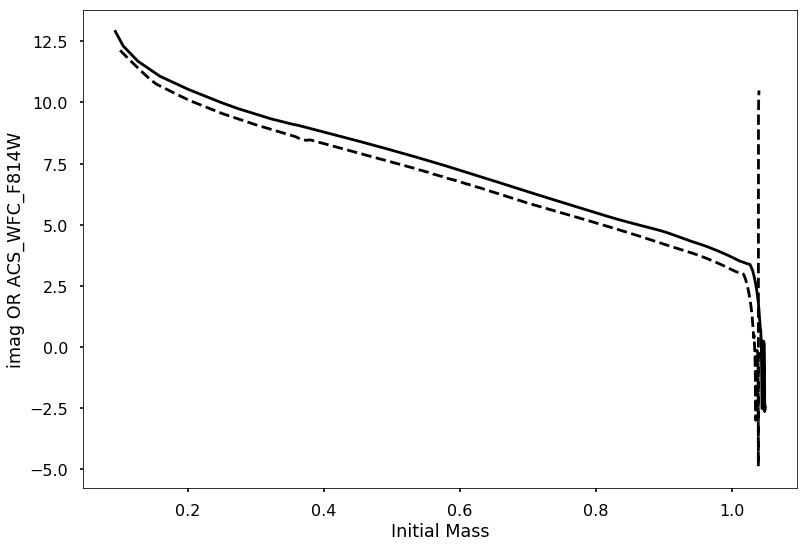

In [142]:
c1, c2 = 'imag','ACS_WFC_F814W'
plt.plot(df1['initial_mass'], df1[c1], 'k-')
plt.plot(df2['initial_mass'], df2[c2], 'k--')
plt.xlabel('Initial Mass'), plt.ylabel(c1 + ' OR ' + c2)

(<matplotlib.text.Text at 0x1147fd990>, <matplotlib.text.Text at 0x114065410>)

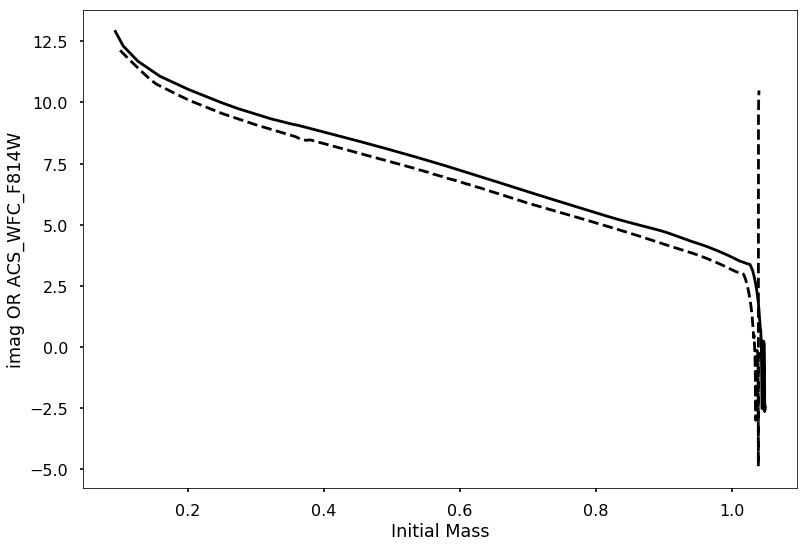

In [140]:
c1, c2 = 'imag','ACS_WFC_F814W'
plt.plot(df1['initial_mass'], df1[c1], 'k-')
plt.plot(df2['initial_mass'], df2[c2], 'k--')
plt.xlabel('Initial Mass'), plt.ylabel(c1 + ' OR ' + c2)

In [75]:
_, mags = iso_model2.get_isochrone(10., -0.01)

In [74]:
mags

array([[ 16.71003 ,  16.11805 ,  15.974681, ...,  10.082729,  10.122205,
         10.161072],
       [ 12.125379,  11.768383,  11.680524, ...,  10.422613,  10.455298,
         10.48736 ]])

In [76]:
mags

array([[ 16.6754644 ,  16.09116556,  15.95337388, ...,  10.37201288,
         10.39648088,  10.42335888],
       [ 12.11071224,  11.75815644,  11.67371488, ...,  10.66448572,
         10.68475072,  10.70695772]])

NameError: name 'pcmd_disk' is not defined

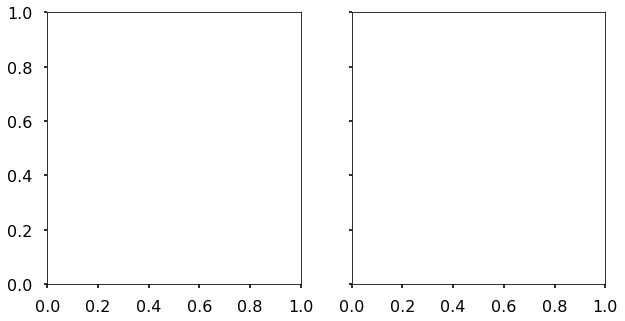

In [25]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5), sharex=True, sharey=True)
nbins = 100
bins=[np.linspace(-1, 4, nbins), np.linspace(-4, 5, nbins)]
axes[0].hist2d(pcmd_disk[0], pcmd_disk[1], bins=bins, norm=mpl.colors.LogNorm(), normed=True, cmap='viridis')
plt.subplot(axes[1])
plt.hist2d(pcmd_model[0], pcmd_model[1], bins=bins, norm=mpl.colors.LogNorm(), normed=True,cmap='viridis')
plt.colorbar()
axes[0].set_ylim([5, -4]), axes[1].set_xlim([-1, 4])
iso_model.plot_isochrone(ssp, ax=axes[0])
iso_model.plot_isochrone(ssp, ax=axes[1])
axes[0].set_xticks([-1, 0, 1, 2, 3, 4])

In [91]:
nd = pcmd_disk.shape[1]
nm = pcmd_model.shape[1]

In [94]:
ratio = float(nm)/nd

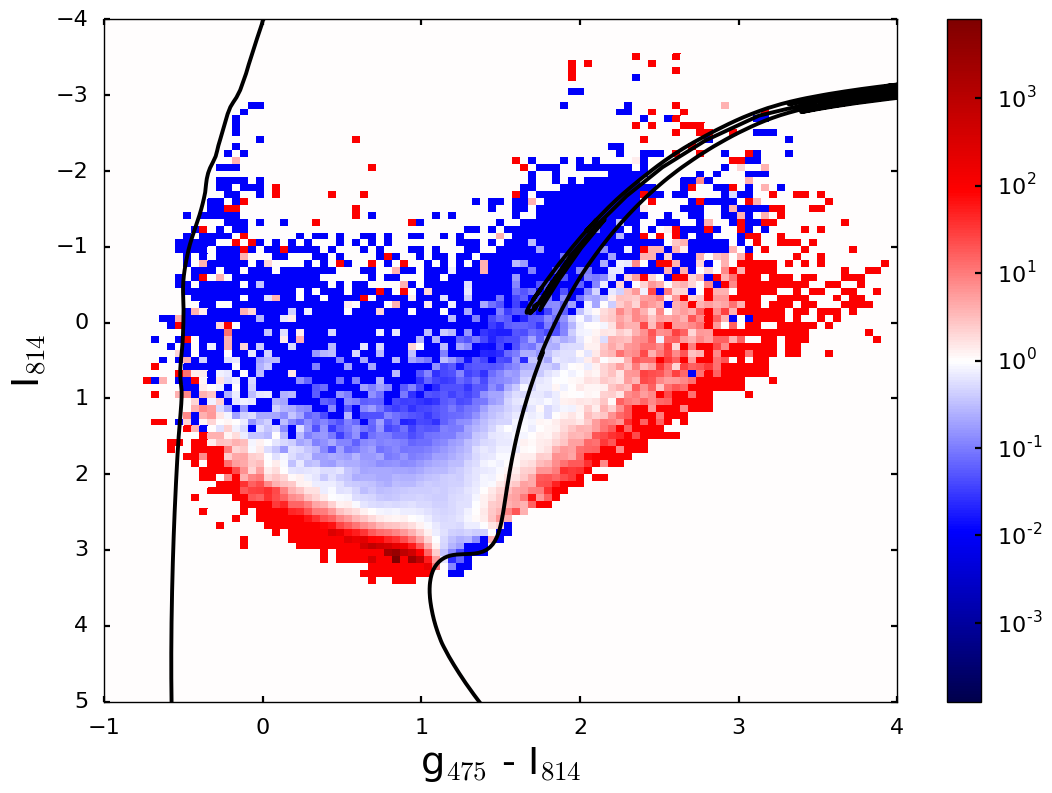

In [97]:
fig, ax = plt.subplots()
nbins = 100
bins=[np.linspace(-1, 4, nbins), np.linspace(-4, 5, nbins)]
h_disk, _, _ = np.histogram2d(pcmd_disk[0], pcmd_disk[1], bins=bins)
h_mod, _, _ = np.histogram2d(pcmd_model[0], pcmd_model[1], bins=bins)
# res_disk = ax.hist2d(pcmd_disk[0], pcmd_disk[1], bins=100, norm=mpl.colors.LogNorm(), alpha=0.)
# res_mod = ax.hist2d(pcmd_model[0], pcmd_model[1], bins=100, norm=mpl.colors.LogNorm(), alpha=0.)
h = h_disk * ratio / h_mod
h[np.isnan(h)] = 1.
h[np.isinf(h)] = 1e2
h[h==0] = 1e-2
plt.subplot(ax)
vm = np.max(np.abs(np.log10(h)))
plt.pcolormesh(bins[0], bins[1], h.T, norm=mpl.colors.LogNorm(vmin=10.**(-vm), vmax=10.**(vm)), cmap='seismic')
ax.set_ylim([5, -4]), ax.set_xlim([-1, 4])
iso_model.plot_isochrone(ssp, ax=ax)
plt.colorbar()

In [53]:
sorted(np.unique(h.flatten()))[::-1]

[inf,
 1421.4648504388874,
 1119.1760949045863,
 838.62382179164808,
 747.12839578544663,
 725.89741295527813,
 565.1485429554325,
 490.33460345864893,
 400.35567622603082,
 373.31144809712606,
 346.77271955941563,
 231.31661293059562,
 218.88132298721132,
 202.19983647779338,
 201.1888372954044,
 200.17783811301541,
 195.93164154698178,
 178.94685528284714,
 170.42557645985445,
 159.73787081745678,
 156.30047359733427,
 145.41538240027975,
 131.93539330176017,
 131.83429338352127,
 129.64120284941598,
 125.02689888876888,
 109.33234015263544,
 106.91316353763324,
 104.13291578606359,
 99.727847919940231,
 97.989151523853721,
 88.967928050229077,
 78.857936226339405,
 71.131013903795164,
 69.84319351670446,
 68.242444811255268,
 65.714946855282861,
 64.029948217967899,
 63.692948490504911,
 62.681949308115946,
 60.200405860433946,
 59.509503597860906,
 56.541065385457038,
 55.099455440198703,
 54.59395584900421,
 50.269126013229176,
 50.145559446492769,
 49.538959937059374,
 44.9674853

In [26]:
params = np.array([-1.5, -2., 1.8, 7.])
gal = ppy.galaxy.Tau_Model(params)

In [27]:
mags, _ = driver.simulate(gal, 128)
pcmd_model = ppy.utils.make_pcmd(mags)

In [33]:
ssp = ppy.galaxy.Galaxy_SSP(np.array([0., -2., 3., 10.]))

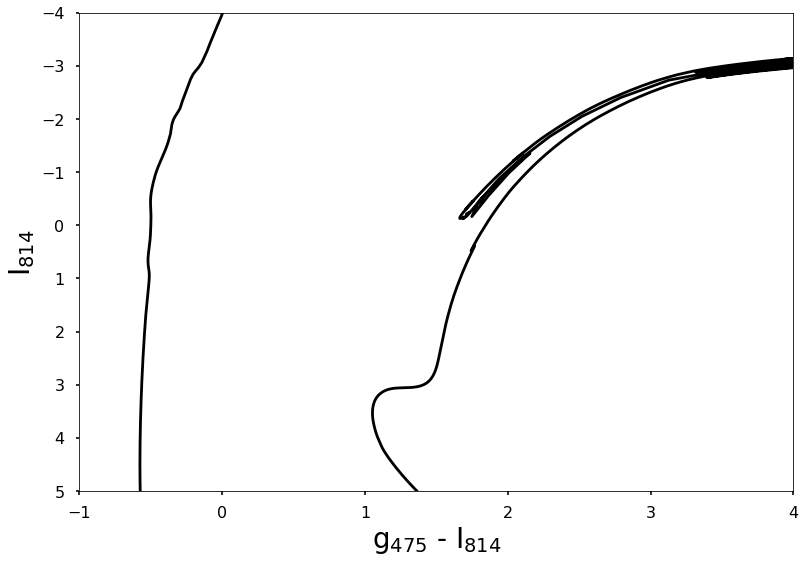

In [38]:
fig, ax = plt.subplots()
bins=[np.linspace(-1, 4, 200), np.linspace(-4, 5, 200)]
h_disk = np.histogram2d(pcmd_disk[0], pcmd_disk[1], bins=bins)
h_mod = np.histogram2d(pcmd_model[0], pcmd_)
res_disk = ax.hist2d(pcmd_disk[0], pcmd_disk[1], bins=100, norm=mpl.colors.LogNorm(), alpha=0.)
res_mod = ax.hist2d(pcmd_model[0], pcmd_model[1], bins=100, norm=mpl.colors.LogNorm(), alpha=0.)
ax.set_ylim([5, -4]), ax.set_xlim([-1, 4])
iso_model.plot_isochrone(ssp, ax=ax)

In [39]:
plt.hist2d()

(array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  1.]]),
 array([ 0.722998  ,  0.74456062,  0.76612324,  0.78768586,  0.80924848,
         0.8308111 ,  0.85237372,  0.87393634,  0.89549896,  0.91706158,
         0.9386242 ,  0.96018682,  0.98174944,  1.00331206,  1.02487468,
         1.0464373 ,  1.06799992,  1.08956254,  1.11112516,  1.13268778,
         1.1542504 ,  1.17581302,  1.19737564,  1.21893826,  1.24050088,
         1.2620635 ,  1.28362612,  1.30518874,  1.32675136,  1.34831398,
         1.3698766 ,  1.39143922,  1.41300184,  1.43456446,  1.45612708,
         1.4776897 ,  1.49925232,  1.52081494,  1.54237756,  1.56394018,
         1.5855028 ,  1.60706542,  1.62862804,  1.65019066,  1.67175328,
         1.6933159 ,  1.71487852,  1.73644114,  1.7580037